<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/Copy_of_tf2ss_chapter_6_exmaple_6_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

Open loop TF =  
           200
--------------------------
s^4 + 6 s^3 + 11 s^2 + 6 s

Closed loop TF =  
              200
--------------------------------
s^4 + 6 s^3 + 11 s^2 + 6 s + 200

Poles =  [-4.27596911+2.54086688j -4.27596911-2.54086688j  1.27596911+2.54086688j
  1.27596911-2.54086688j]
Zeros =  []


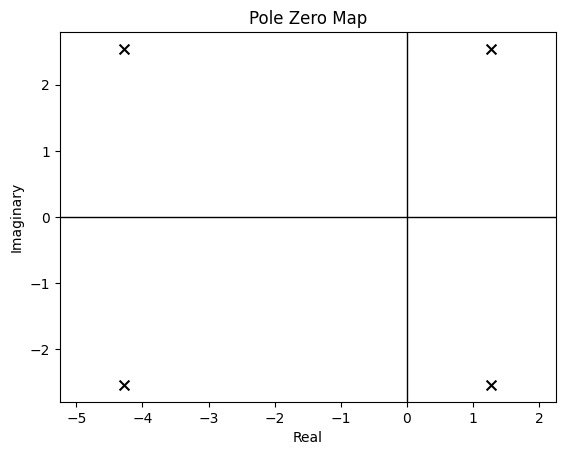

In [ ]:
# Define your transfer function:
#G(s) = 200 / s(s^3+6s^2+11s+6)

# Coefficients of the numerator
num = [200]
# Coefficients of the denominator
den = np.polymul([1, 0],[1, 6, 11, 6])

G = tf(num,den)
print ("Open loop TF = ", G)

# close loop transfer function
TF = feedback(G,1)
print ("Closed loop TF = ", TF)

(p,z) = pzmap(TF)

print("Poles = ",p)
print("Zeros = ",z)

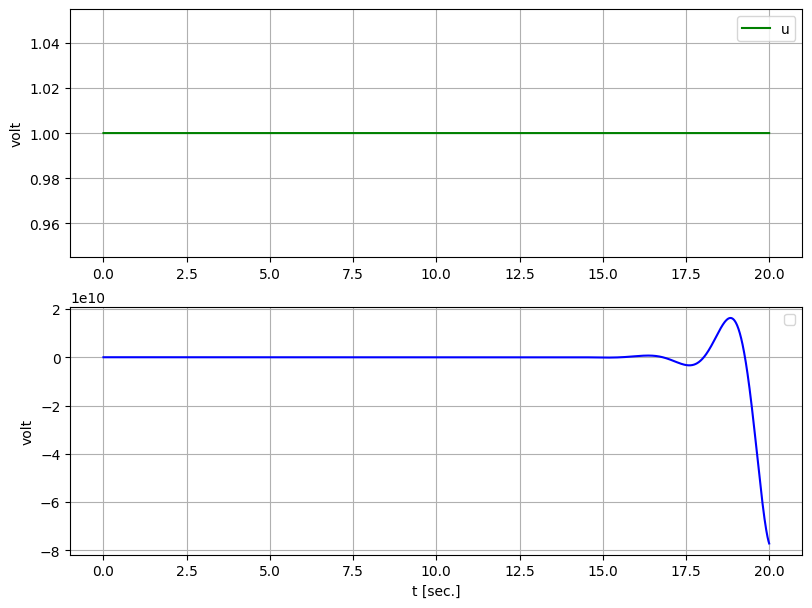

In [ ]:
#Step test of the closed loop TF
# define signals :
t0 = 0
t1 = 20
dt = 0.01
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

u = 1 * np.ones(nt)

# Simulation :
(t, y) = forced_response(TF, T=t, U=u, X0=0)

# Plotting :
plt.close("all")

fig_width_cm = 24
fig_height_cm = 18

plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.subplot(2,1,1)
plt.plot(t, u, "green")

plt.grid()
plt.legend(labels =("u"))
plt.ylabel("volt")

plt.subplot(2,1,2)
plt.legend(labels =("y"))
plt.plot(t, y, "blue")
plt.grid()
plt.xlabel("t [sec.]")
plt.ylabel("volt")

plt.savefig("sim_tf.pdf")